In [21]:
#Read in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [36]:
#Set plot style
plt.style.use('Solarize_Light2')

#Set path to draw_data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Bank Churn Analysis\Data\02_Cleaned_Data'

**Read in Data**

In [3]:
#Read in data
df = pd.read_csv(path + '/2020_0720_Cleaned_Churn_Date.csv', index_col=0)

**Data Preview**

In [4]:
#Display details about data
print('Raw data shape:',df.shape)
display(df.head())

Raw data shape: (10000, 13)


,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


**Data Overview**

In [5]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
gender,10000.0,5.457000e-01,0.497932,0.00,0.00,1.000000e+00,1.000000e+00,1.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Exploratory Data Analysis

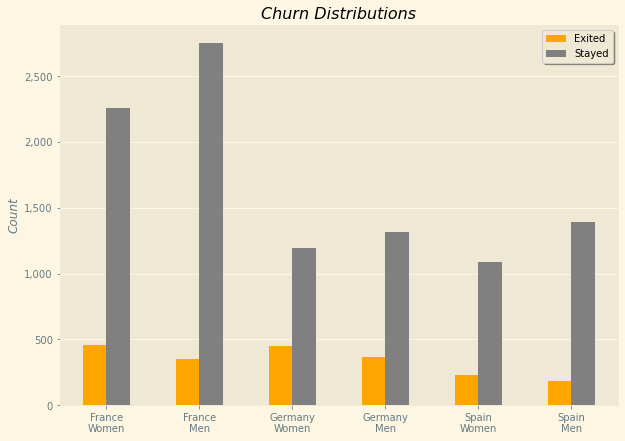

In [59]:
#Create figure
f, ax = plt.subplots(figsize = (10,7))

#Plot target
df.groupby(['geography','gender'])['exited'].agg({'count','sum'}).plot(kind = 'bar', ax = ax, color = ['orange', 'grey'])

cats = ['France\nWomen','France\nMen','Germany\nWomen','Germany\nMen','Spain\nWomen','Spain\nMen']
# ax.set_xticks(cats)
ax.set_xticklabels(cats)
plt.xticks(rotation=0)

###Set plot aesthetics**
ax.set_title('Churn Distributions', style = 'italic')
ax.set_xlabel('')
ax.set_ylabel('Count', style = 'italic')
ax.legend(['Exited', 'Stayed'], shadow = True, frameon = True)
ax.grid(axis = 'x',b=False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


<AxesSubplot:xlabel='age'>

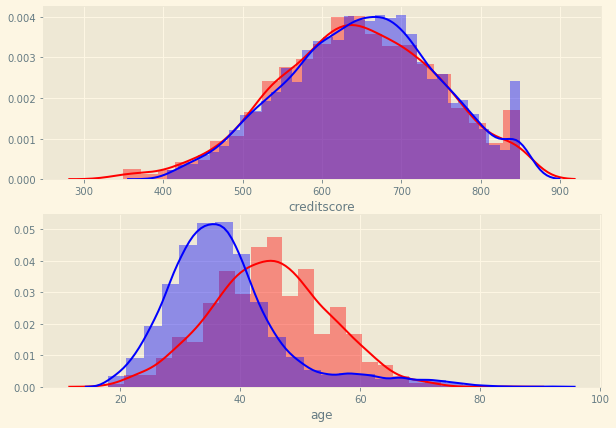

In [76]:
#Create figure
f, ax = plt.subplots(2,1,figsize = (10,7))


sns.distplot(df.loc[df['exited'] == 1].creditscore, color = 'r',ax=ax[0])
sns.distplot(df.loc[df['exited'] == 0].creditscore, color = 'b',ax=ax[0])

sns.distplot(df.loc[df['exited'] == 1].age, color = 'r',ax=ax[1], bins = 25)
sns.distplot(df.loc[df['exited'] == 0].age, color = 'b',ax=ax[1], bins = 25)

<AxesSubplot:>

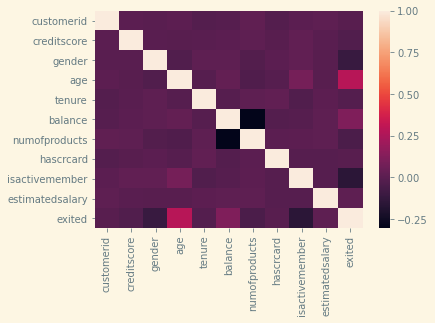

In [78]:
corr = df.corr()

sns.heatmap(corr)